# Load Data

In [1]:
# Enable autoreload for development
%load_ext autoreload
%autoreload 2

In [2]:
# Setup
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [4]:
# Load and clean data
from src.load_data import load_data

In [5]:
df = load_data()
df

No.  Diameter (mm)  Speed (rpm)  Feed (mm/rev)  Thrust force (N)  \
0      1            9.0          500           0.13            1088.1   
1      2            9.0          500           0.18            1435.1   
2      3            9.0          500           0.25            1588.3   
3      4            9.0          500           0.36            1669.8   
4      5            9.0          400           0.13            1150.9   
..   ...            ...          ...            ...               ...   
160  161           10.0         1000           0.50            1960.0   
161  162            7.5         1000           0.50             784.0   
162  163            5.0         1000           0.50             651.0   
163  164           10.0         1000           0.71            2009.0   
164  165            7.5         1000           0.71             970.0   

     Torque (Nm)  Flank wear (mm)  Workpiece  
0          10.67             0.10  cast iron  
1          14.66             0.13  cast iron  
2          16.04             0.06  cast iron  
3          17.12             0.09  cast iron  
4          11.22             0.12  cast iron  
..           ...              ...        ...  
160        18.13             0.13     copper  
161         7.35             0.10     copper  
162         6.17             0.07     copper  
163        20.58             0.17     copper  
164         8.05             0.12     copper  

[165 rows x 8 columns]

# Clean the data

In [6]:
from src.clean_data import clean_dataset, add_features
df_clean = clean_dataset(df)

In [7]:
df.shape

(165, 8)

# Feature Engineering

In [8]:
df_clean = add_features(df_clean)  # ⬅ Feature Engineering : this includes new features

In [9]:
# Identify one-hot workpiece columns (e.g., 'workpiece_b', 'workpiece_c', etc.)
workpiece_cols = [col for col in df_clean.columns if col.startswith('workpiece_')]

In [10]:
df_clean["thrust_force_(n)"] = df_clean["thrust_force_(n)"] / 1000

# Removing & Capping Outliers - Winsorizing

In [11]:
from src.outlier_handling import cap_outliers_iqr
df_clean = cap_outliers_iqr(df_clean, 'thrust_force_(n)', multiplier=1.5)


[Capping] thrust_force_(n) → Q1: 0.84, Q3: 2.48, Lower: -1.64, Upper: 4.96


# New list of Columns

In [12]:
# Confirm all required columns exist
print("Cleaned Columns:", df_clean.columns.tolist())

Cleaned Columns: ['no.', 'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'thrust_force_(n)', 'torque_(nm)', 'flank_wear_(mm)', 'workpiece_copper', 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 'torque_feed_ratio', 'material_hardness', 'feed_squared', 'speed_squared']


In [13]:
df_clean.shape

(164, 15)

In [14]:
df_clean.columns

Index(['no.', 'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)',
       'thrust_force_(n)', 'torque_(nm)', 'flank_wear_(mm)',
       'workpiece_copper', 'workpiece_mild steel', 'speed_per_dia', 'log_feed',
       'torque_feed_ratio', 'material_hardness', 'feed_squared',
       'speed_squared'],
      dtype='object')

In [15]:
# Correlation of all features with Flank Wear
corr_matrix = df_clean.corr(numeric_only=True)
flank_corr = corr_matrix['flank_wear_(mm)'].sort_values(ascending=False)
print("Correlation with Flankwear")
display(flank_corr)


Correlation with Flankwear


flank_wear_(mm)         1.000000
diameter_(mm)           0.376967
thrust_force_(n)        0.366448
torque_feed_ratio       0.335095
torque_(nm)             0.214763
material_hardness       0.163496
workpiece_copper       -0.032785
no.                    -0.095608
feed_squared           -0.114098
workpiece_mild steel   -0.119936
feed_(mm/rev)          -0.129171
log_feed               -0.133833
speed_squared          -0.197722
speed_(rpm)            -0.204360
speed_per_dia          -0.334941
Name: flank_wear_(mm), dtype: float64

# Plots

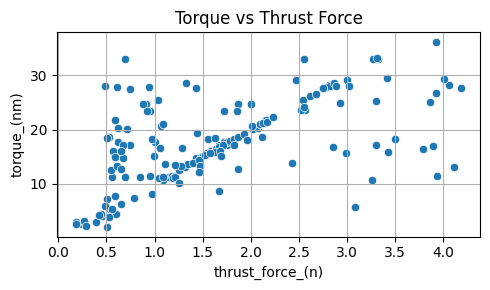

In [16]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness', 'torque_(nm)',
# 'feed_squared', 'speed_squared']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_clean, x='thrust_force_(n)', y='torque_(nm)')
plt.title("Torque vs Thrust Force")
plt.grid(True)
plt.tight_layout()
plt.show()


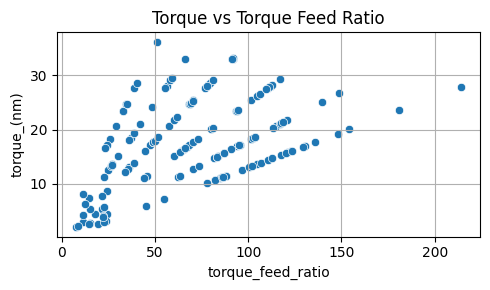

In [17]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness', 'torque_(nm)',
# 'feed_squared', 'speed_squared']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_clean, x='torque_feed_ratio', y='torque_(nm)')
plt.title("Torque vs Torque Feed Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()


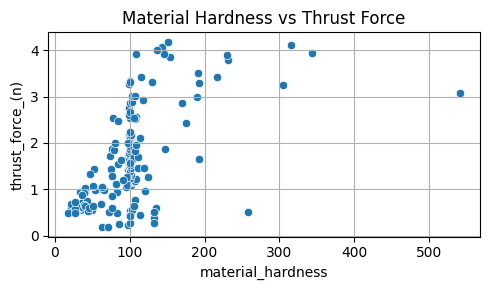

In [18]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness', 'torque_(nm)',
# 'feed_squared', 'speed_squared']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_clean, x='material_hardness', y='thrust_force_(n)')
plt.title("Material Hardness vs Thrust Force")
plt.grid(True)
plt.tight_layout()
plt.show()


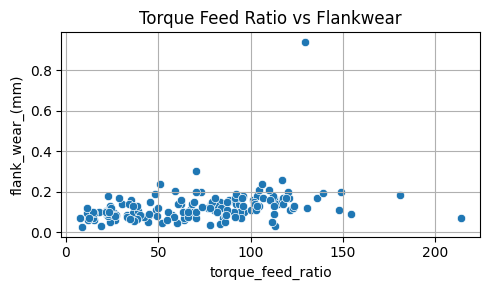

In [19]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness', 'torque_(nm)',
# 'feed_squared', 'speed_squared']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_clean, x='torque_feed_ratio', y='flank_wear_(mm)')
plt.title("Torque Feed Ratio vs Flankwear")
plt.grid(True)
plt.tight_layout()
plt.show()


# Features and targets:

In [20]:
X = df_clean[['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)',
              'speed_per_dia', 'log_feed',
              'torque_feed_ratio', 'material_hardness',
              'feed_squared', 'speed_squared'] + workpiece_cols]
import numpy as np
# Target transformation: log-transform all 3 targets
y = df_clean[['thrust_force_(n)', 'torque_(nm)', 'flank_wear_(mm)']].copy()

# Log-transform each to handle skewness and stabilize variance
for col in y.columns:
    y[col] = np.log1p(y[col])  # log1p avoids issues with zeros

# Interpretation of logarithmic transformation of target variable: 
Reduce the impact of large values (outliers)

Stabilize variance

Make skewed data more normal (which improves model performance)

log1p() is used instead of log() so that values like 0 don’t cause errors (since log(0) is undefined).

# Tuning RF Model:

In [21]:
# Model tuning
from src.tune_models import tune_random_forest
best_rf, best_params, cv_results = tune_random_forest(X, y)
print("Best Params:", best_params)

import pandas as pd
cv_df = pd.DataFrame(cv_results)
cv_df = cv_df.sort_values(by='mean_test_score', ascending=False)
#cv_df[['params', 'mean_test_score', 'rank_test_score']].head()

Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}


# Target: torque_(nm)

In [22]:
# Model training and evaluation
from src.model_train import train_models

results = train_models(X, y)

# Extract test set and predictions (still log-scale here)
X_test = results['X_test']  # the features used to test model performance
y_test_log = results['y_test']   # the actual test target values in log-scale 
models = results['models']  # the trained Random Forest, XGBoost, KNN, etc.
metrics = results['metrics']  # how well each model performed on test data

# Inverse transform log-scale targets for real-world evaluation
import numpy as np
y_test_orig = np.expm1(np.clip(y_test_log.values, 0, 20))
# y_test_orig now holds the actual test values in the original scale

In [23]:
import pandas as pd

rows = []

#'thrust_force_(n)', 'torque_(nm)', 'flank_wear_(mm)'

for model_name, model_metrics in metrics.items():
    for i, target in enumerate(y.columns):
        if target == 'torque_(nm)':  # only process 'torque'
            row = {
                'Model': model_name,
                'Target': target,
                'R': model_metrics.get('R', [None]*len(y.columns))[i],
                'R2': model_metrics.get('R2', [None]*len(y.columns))[i],
                'MAE': model_metrics.get('MAE', [None]*len(y.columns))[i],
                'MSE': model_metrics.get('MSE', [None]*len(y.columns))[i],
                'RMSE': model_metrics.get('RMSE', [None]*len(y.columns))[i]
            }
            rows.append(row)

summary_df = pd.DataFrame(rows)
display(summary_df.sort_values(by='Model'))


Model       Target         R        R2       MAE       MSE      RMSE
2      AdaBoost  torque_(nm)  0.955800  0.895951  1.802407  6.395532  2.528939
0  RandomForest  torque_(nm)  0.957037  0.913854  1.633205  5.295114  2.301111
1       XGBoost  torque_(nm)  0.967756  0.934430  1.242508  4.030328  2.007568

In [24]:
# # Auto-install LIME if not already installed
# try:
#     from lime.lime_tabular import LimeTabularExplainer
# except ImportError:
#     print("LIME not found. Installing it now...")
#     %pip install lime
#     from lime.lime_tabular import LimeTabularExplainer


# LIME explanation for XGBoost prediction of torque_(nm) 

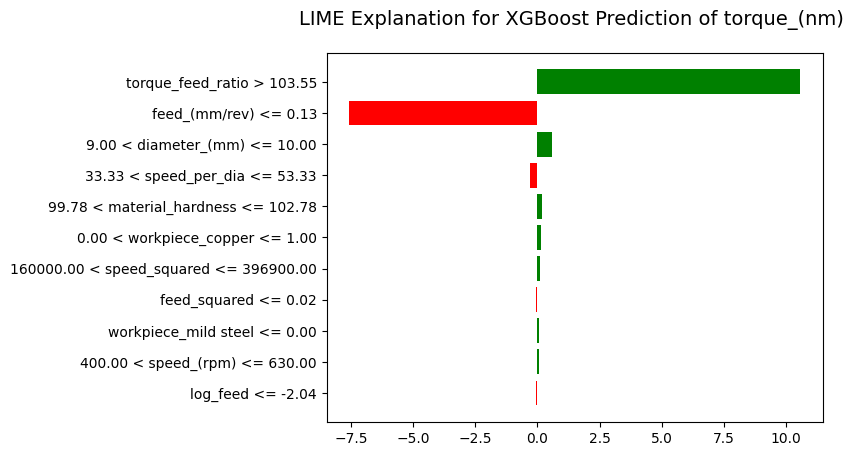


Top contributing features to this prediction:
torque_feed_ratio > 103.55     : 10.5629
feed_(mm/rev) <= 0.13          : -7.5682
9.00 < diameter_(mm) <= 10.00  : 0.5970
33.33 < speed_per_dia <= 53.33 : -0.3081
99.78 < material_hardness <= 102.78 : 0.1866
0.00 < workpiece_copper <= 1.00 : 0.1653
160000.00 < speed_squared <= 396900.00 : 0.1144
feed_squared <= 0.02           : -0.0569
workpiece_mild steel <= 0.00   : 0.0551
400.00 < speed_(rpm) <= 630.00 : 0.0492
log_feed <= -2.04              : -0.0392


In [26]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Step 1: Set up the LIME explainer using test set
feature_names = X_test.columns.tolist()

explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=feature_names,
    mode='regression'
)

# Step 2: Select test instance to explain
idx = 1  # or pick any index you want
instance = X_test.iloc[idx].values.reshape(1, -1)

# Step 3: Define custom predict_fn for torque_(nm)
# NOTE: torque_(nm) is the second column (index 1) of y
def predict_fn_torque(X):
    log_preds = models['XGBoost'].predict(X)
    torque_log = log_preds[:, 1]
    return np.expm1(torque_log).reshape(-1, 1)

# Step 4: Generate LIME explanation
exp = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=predict_fn_torque,
    num_features=len(feature_names)
)
# Step 5: Plot with white background
fig = exp.as_pyplot_figure()
#fig.patch.set_facecolor('white')   # set background to white
plt.title(f"LIME Explanation for XGBoost Prediction of torque_(nm) ", fontsize=14, pad=20)
#plt.title(f"LIME Explanation for XGBoost Prediction of torque_(nm) [Test Sample #{idx}]", fontsize=14, pad=20)
plt.show()

# Step 6: Show results
exp.show_in_notebook()  # interactive display
# Optional: textual summary
print("\nTop contributing features to this prediction:")
for feature, weight in exp.as_list():
    print(f"{feature:30} : {weight:.4f}")

In [ ]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 'workpiece_copper',
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)' 
# 'workpiece_mild steel', 'speed_per_dia', 'log_feed', 
# 'torque_feed_ratio', 'material_hardness',
# 'feed_squared', 'speed_squared']

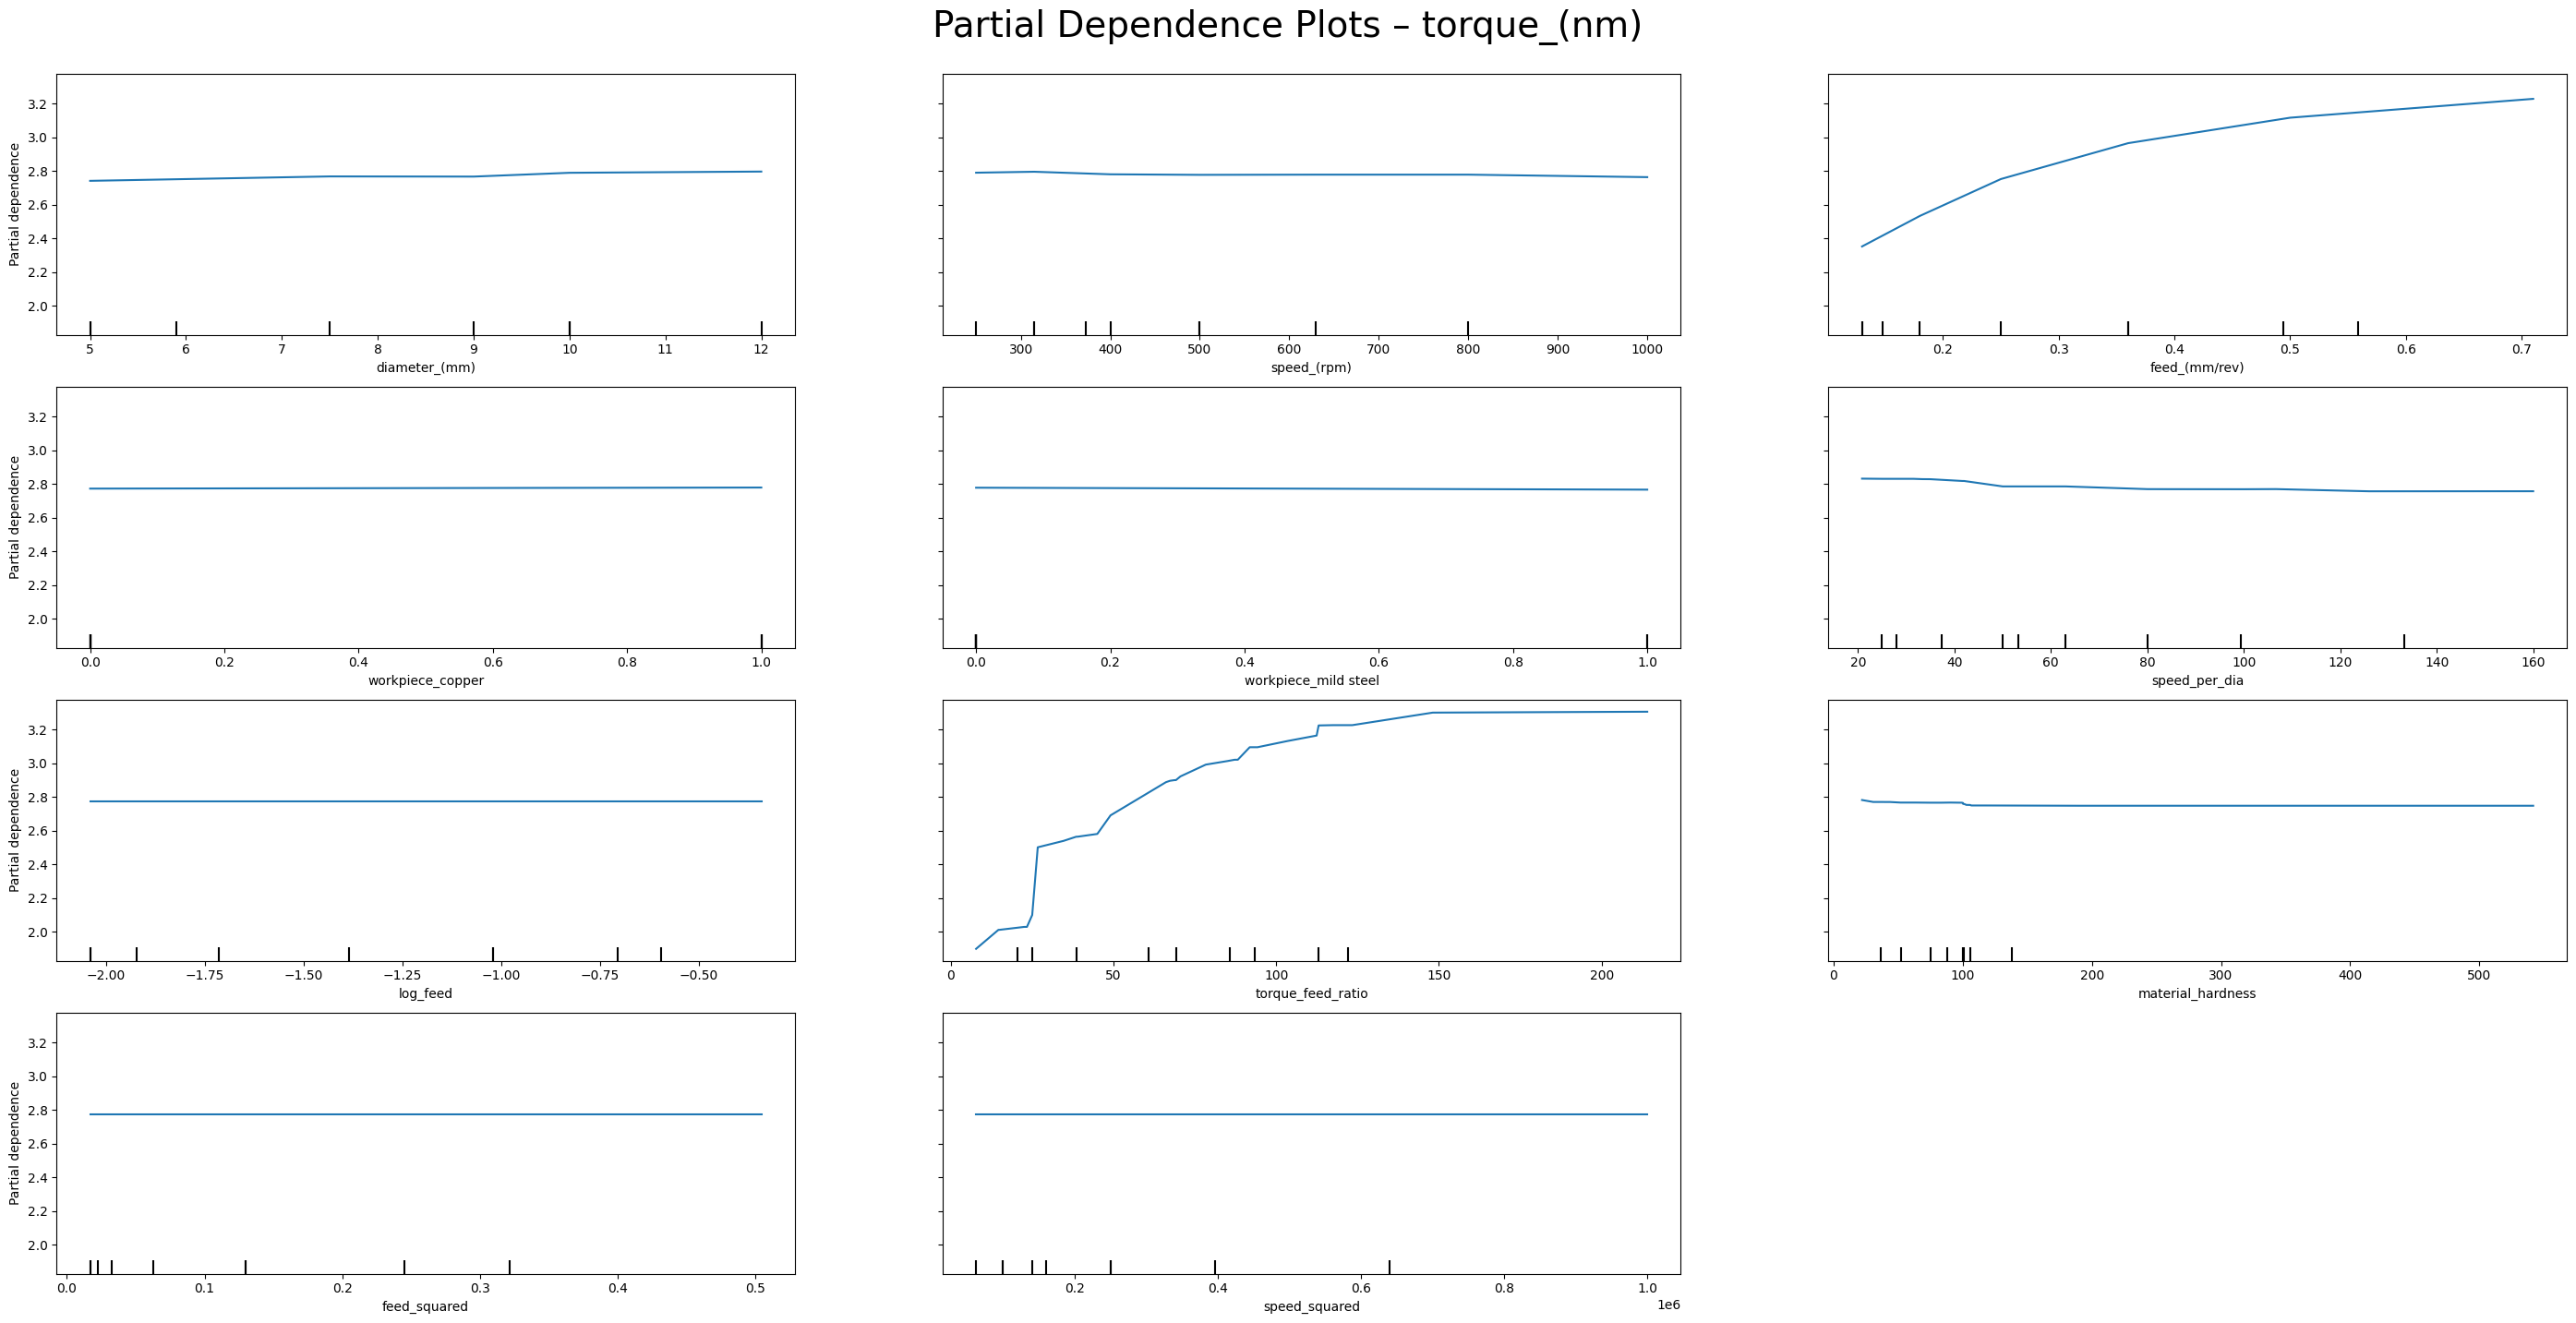

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Model for torque_(nm)
xgb_model_torque = results['models']['XGBoost'].estimators_[1]

# Features for PDP
features = [
    'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 
    'workpiece_copper', 'workpiece_mild steel', 
    'speed_per_dia', 'log_feed', 'torque_feed_ratio', 
    'material_hardness', 'feed_squared', 'speed_squared'
]

# Optional: Ensure X_test has only float values
X_test = X_test.astype(float)

# Create PDP
disp = PartialDependenceDisplay.from_estimator(
    estimator=xgb_model_torque,
    X=X_test,
    features=features,
    feature_names=X_test.columns.tolist(),
    kind='average',
    grid_resolution=50,
    n_jobs=-1
)

# Resize and finalize the plot
fig = disp.figure_
fig.set_size_inches(28, 14)
plt.suptitle("Partial Dependence Plots – torque_(nm)", fontsize=28, y=1.02) 
plt.tight_layout()
plt.subplots_adjust(top=0.97)
plt.show()


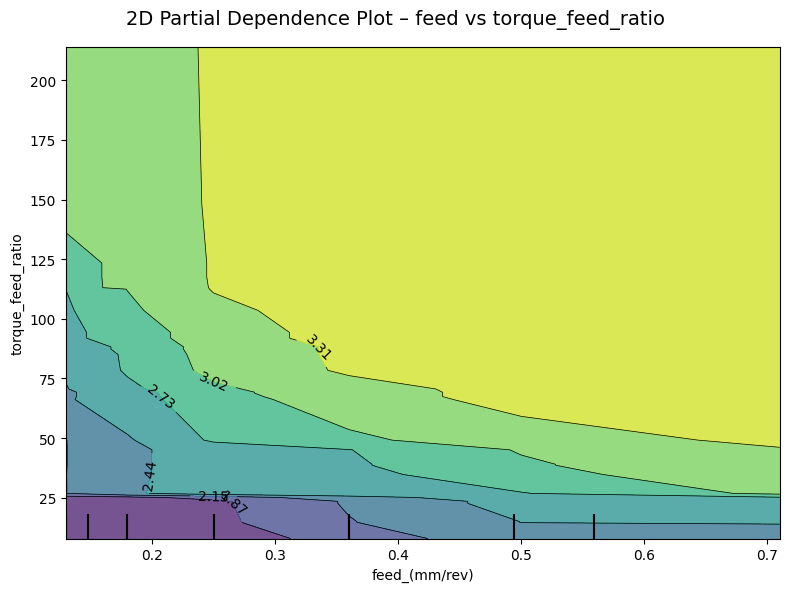

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

xgb_model_torque = results['models']['XGBoost'].estimators_[1]

# Plot 2D PDP
fig, ax = plt.subplots(figsize=(8, 6))

PartialDependenceDisplay.from_estimator(
    estimator=xgb_model_torque,
    X=X_test,
    features=[('feed_(mm/rev)', 'torque_feed_ratio')],
    feature_names=X_test.columns.tolist(),
    kind='average',
    grid_resolution=50,
    ax=ax
)

plt.suptitle("2D Partial Dependence Plot – feed vs torque_feed_ratio", fontsize=14)
plt.tight_layout()
plt.show()


# Target: flankwear

In [ ]:
from src.train_flankwear import train_flankwear_models
X = df_clean[['diameter_(mm)',
 'speed_(rpm)',
 'feed_(mm/rev)',
 'thrust_force_(n)',
 'torque_(nm)',
 #'flank_wear_(mm)',
 'workpiece_copper',
 'workpiece_mild steel',
 'speed_per_dia',
 'log_feed',
 'torque_feed_ratio',
 'material_hardness',
 'feed_squared',
 'speed_squared']]

y_flank = df_clean['flank_wear_(mm)']


In [ ]:
results = train_flankwear_models(X, y_flank)

# Collect results into a list of dictionaries
table_data = []

for model_name, result in results.items():
    metrics = result['metrics']
    metrics['Model'] = model_name
    table_data.append(metrics)

# Convert to DataFrame
results_df = pd.DataFrame(table_data)

# Reorder columns (optional)
cols = ['Model', 'R', 'R2', 'MAE', 'MSE', 'RMSE', 'MAPE']
results_df = results_df[cols]

# Display the table
print("Results of Flankwear:")
print("----------------------")
print(results_df.to_string(index=False)) 


Results of Flankwear:
----------------------
       Model        R       R2      MAE      MSE     RMSE      MAPE
RandomForest 0.752490 0.531190 0.027771 0.001488 0.038570 33.523487
     XGBoost 0.921476 0.909162 0.023187 0.000876 0.029592 27.557532
    AdaBoost 0.620990 0.481403 0.030576 0.001568 0.039601 36.621997


# LIME Explanation for XGBoost prediction of flank_wear :


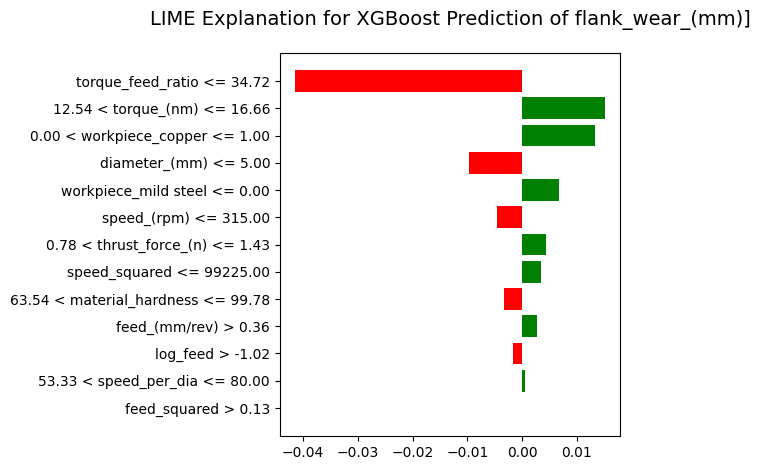


Top contributing features to this prediction:
torque_feed_ratio <= 34.72     : -0.0414
12.54 < torque_(nm) <= 16.66   : 0.0150
0.00 < workpiece_copper <= 1.00 : 0.0133
diameter_(mm) <= 5.00          : -0.0096
workpiece_mild steel <= 0.00   : 0.0066
speed_(rpm) <= 315.00          : -0.0046
0.78 < thrust_force_(n) <= 1.43 : 0.0044
speed_squared <= 99225.00      : 0.0034
63.54 < material_hardness <= 99.78 : -0.0033
feed_(mm/rev) > 0.36           : 0.0027
log_feed > -1.02               : -0.0017
53.33 < speed_per_dia <= 80.00 : 0.0006
feed_squared > 0.13            : 0.0000


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load XGBoost model and test data from the flankwear results
xgb_model_flank = results['XGBoost']['model']
X_test = results['XGBoost']['X_test']
feature_names = X_test.columns.tolist()

# Step 2: Choose the test instance to explain
idx = 18  # 🔁 change to any index you want
instance = X_test.iloc[idx].values.reshape(1, -1)

# Step 3: Define predict function with inverse log transform
def predict_fn_flank(X):
    log_preds = xgb_model_flank.predict(X)
    return np.expm1(log_preds).reshape(-1, 1)  # Return shape: (n_samples, 1)

# Step 4: Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=feature_names,
    mode='regression'
)

# Step 5: Generate LIME explanation
exp = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=predict_fn_flank,
    num_features=len(feature_names)
)

# Step 6: Plot explanation
fig = exp.as_pyplot_figure()
fig.patch.set_facecolor('white')
plt.title(f"LIME Explanation for XGBoost Prediction of flank_wear_(mm)]", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Step 7: Print feature contributions
print("\nTop contributing features to this prediction:")
for feature, weight in exp.as_list():
    print(f"{feature:30} : {weight:.4f}")

# Optional: Interactive output in notebook
exp.show_in_notebook()


# Explanations for 5 worst predictions for Flank_wear

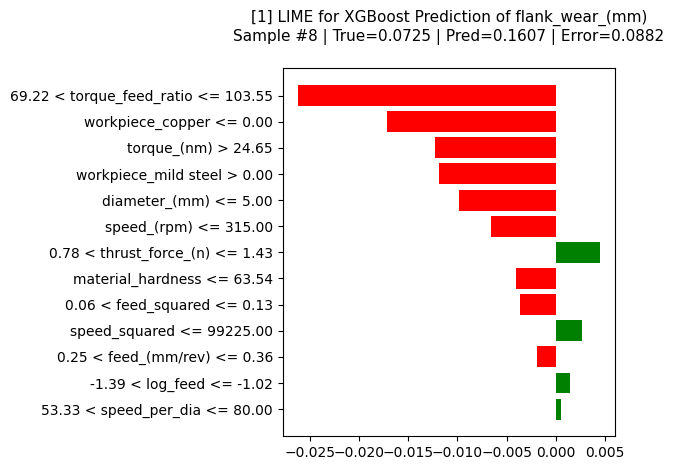


[Sample #8] True: 0.0725, Pred: 0.1607, Error: 0.0882
69.22 < torque_feed_ratio <= 103.55 : -0.0262
workpiece_copper <= 0.00            : -0.0172
torque_(nm) > 24.65                 : -0.0123
workpiece_mild steel > 0.00         : -0.0119
diameter_(mm) <= 5.00               : -0.0098
speed_(rpm) <= 315.00               : -0.0066
0.78 < thrust_force_(n) <= 1.43     : 0.0045
material_hardness <= 63.54          : -0.0040
0.06 < feed_squared <= 0.13         : -0.0037
speed_squared <= 99225.00           : 0.0026
0.25 < feed_(mm/rev) <= 0.36        : -0.0020
-1.39 < log_feed <= -1.02           : 0.0014
53.33 < speed_per_dia <= 80.00      : 0.0005

----------------------------------------------------------------------


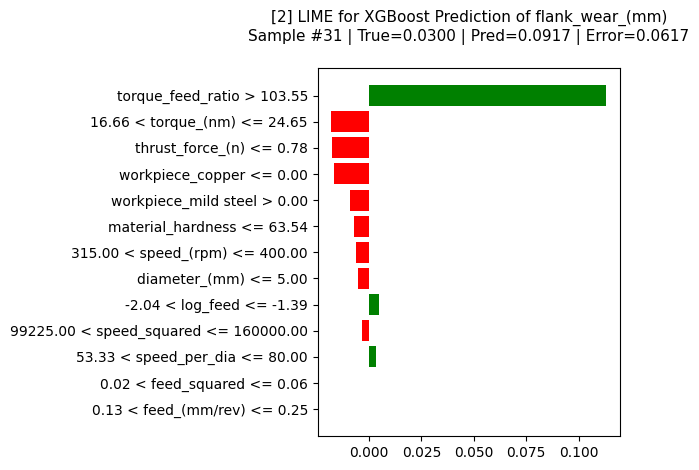


[Sample #31] True: 0.0300, Pred: 0.0917, Error: 0.0617
torque_feed_ratio > 103.55          : 0.1131
16.66 < torque_(nm) <= 24.65        : -0.0179
thrust_force_(n) <= 0.78            : -0.0176
workpiece_copper <= 0.00            : -0.0168
workpiece_mild steel > 0.00         : -0.0093
material_hardness <= 63.54          : -0.0071
315.00 < speed_(rpm) <= 400.00      : -0.0064
diameter_(mm) <= 5.00               : -0.0054
-2.04 < log_feed <= -1.39           : 0.0045
99225.00 < speed_squared <= 160000.00 : -0.0035
53.33 < speed_per_dia <= 80.00      : 0.0035
0.02 < feed_squared <= 0.06         : -0.0001
0.13 < feed_(mm/rev) <= 0.25        : 0.0001

----------------------------------------------------------------------


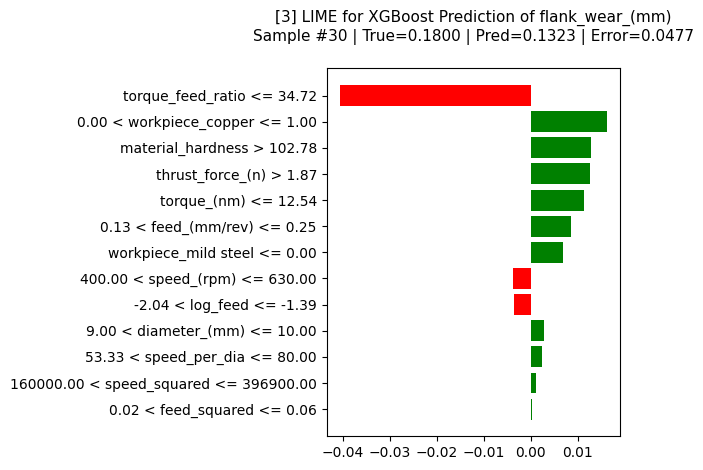


[Sample #30] True: 0.1800, Pred: 0.1323, Error: 0.0477
torque_feed_ratio <= 34.72          : -0.0406
0.00 < workpiece_copper <= 1.00     : 0.0161
material_hardness > 102.78          : 0.0129
thrust_force_(n) > 1.87             : 0.0126
torque_(nm) <= 12.54                : 0.0114
0.13 < feed_(mm/rev) <= 0.25        : 0.0085
workpiece_mild steel <= 0.00        : 0.0069
400.00 < speed_(rpm) <= 630.00      : -0.0037
-2.04 < log_feed <= -1.39           : -0.0035
9.00 < diameter_(mm) <= 10.00       : 0.0029
53.33 < speed_per_dia <= 80.00      : 0.0023
160000.00 < speed_squared <= 396900.00 : 0.0010
0.02 < feed_squared <= 0.06         : 0.0002

----------------------------------------------------------------------


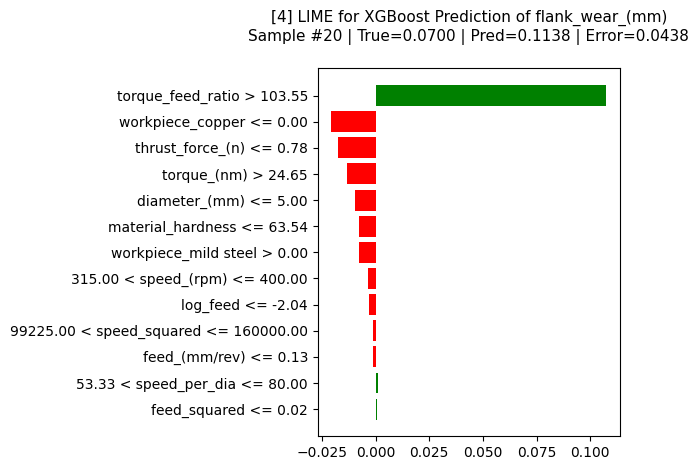


[Sample #20] True: 0.0700, Pred: 0.1138, Error: 0.0438
torque_feed_ratio > 103.55          : 0.1074
workpiece_copper <= 0.00            : -0.0206
thrust_force_(n) <= 0.78            : -0.0176
torque_(nm) > 24.65                 : -0.0135
diameter_(mm) <= 5.00               : -0.0097
material_hardness <= 63.54          : -0.0079
workpiece_mild steel > 0.00         : -0.0077
315.00 < speed_(rpm) <= 400.00      : -0.0036
log_feed <= -2.04                   : -0.0031
99225.00 < speed_squared <= 160000.00 : -0.0014
feed_(mm/rev) <= 0.13               : -0.0013
53.33 < speed_per_dia <= 80.00      : 0.0012
feed_squared <= 0.02                : 0.0006

----------------------------------------------------------------------


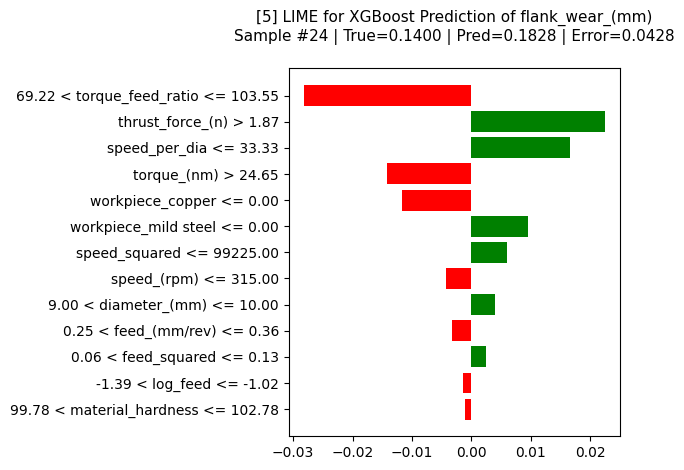


[Sample #24] True: 0.1400, Pred: 0.1828, Error: 0.0428
69.22 < torque_feed_ratio <= 103.55 : -0.0282
thrust_force_(n) > 1.87             : 0.0225
speed_per_dia <= 33.33              : 0.0165
torque_(nm) > 24.65                 : -0.0142
workpiece_copper <= 0.00            : -0.0117
workpiece_mild steel <= 0.00        : 0.0096
speed_squared <= 99225.00           : 0.0059
speed_(rpm) <= 315.00               : -0.0043
9.00 < diameter_(mm) <= 10.00       : 0.0039
0.25 < feed_(mm/rev) <= 0.36        : -0.0033
0.06 < feed_squared <= 0.13         : 0.0025
-1.39 < log_feed <= -1.02           : -0.0013
99.78 < material_hardness <= 102.78 : -0.0010

----------------------------------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# === Extract what we need ===
xgb_model = results['XGBoost']['model']
X_test = results['XGBoost']['X_test']
y_test_log = results['XGBoost']['y_test']
y_test_true = np.expm1(y_test_log)  # inverse log1p
y_pred_log = xgb_model.predict(X_test)
y_pred_true = np.expm1(y_pred_log)

# === Calculate absolute errors ===
errors = np.abs(y_test_true - y_pred_true)

# === Get indices of top N worst errors ===
N = 5  # 🔁 change this to any N you want
worst_indices = np.argsort(-errors)[:N]

# === Create LIME explainer ===
explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=X_test.columns.tolist(),
    mode='regression'
)

# === Loop through top N errors and explain ===
for rank, idx in enumerate(worst_indices, 1):
    instance = X_test.iloc[idx].values.reshape(1, -1)

    def predict_fn(X):
        log_preds = xgb_model.predict(X)
        return np.expm1(log_preds).reshape(-1, 1)

    exp = explainer.explain_instance(
        data_row=instance.flatten(),
        predict_fn=predict_fn,
        num_features=len(X_test.columns)
    )

    # === Plot explanation ===
    fig = exp.as_pyplot_figure()
    fig.patch.set_facecolor('white')
    plt.title(f"[{rank}] LIME for XGBoost Prediction of flank_wear_(mm)\nSample #{idx} | True={y_test_true.iloc[idx]:.4f} | Pred={y_pred_true[idx]:.4f} | Error={errors.iloc[idx]:.4f}",
          fontsize=11, pad=20)
    plt.tight_layout()
    plt.show()

    # === Print text summary ===
    print(f"\n[Sample #{idx}] True: {y_test_true.iloc[idx]:.4f}, Pred: {y_pred_true[idx]:.4f}, Error: {errors.iloc[idx]:.4f}")
    for feature, weight in exp.as_list():
        print(f"{feature:35} : {weight:.4f}")
    print("\n" + "-"*70)


# PDP Explanation for XGBoost prediction of flank_wear :


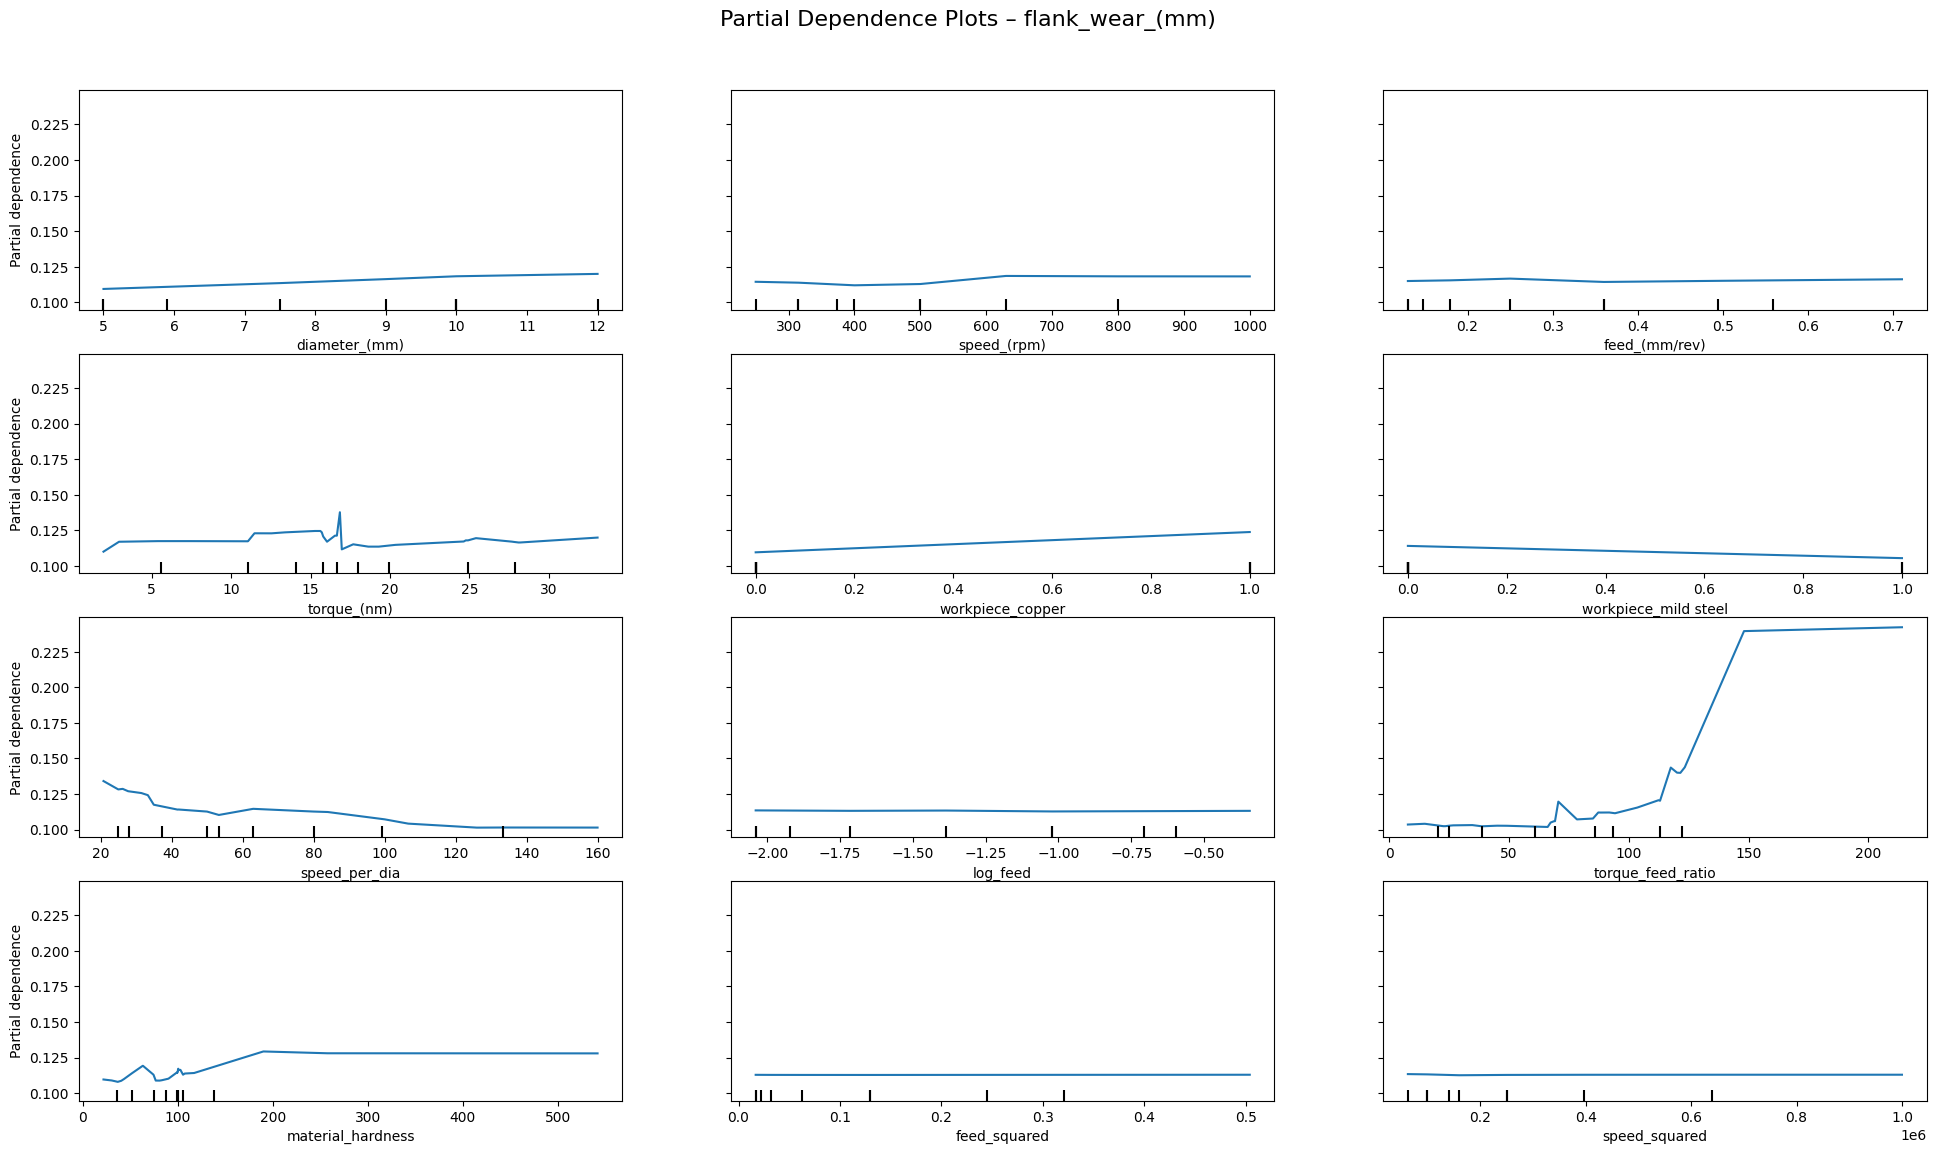

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Step 1: Extract model and test data
xgb_model_flank = results['XGBoost']['model']
X_test_flank = results['XGBoost']['X_test']  # from your returned dict
# Convert all integer columns in X_test_flank to float
X_test_flank = X_test_flank.astype(float)

# Step 2: Define feature list for PDP
features_flankwear = [
    'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 
    'torque_(nm)', 'workpiece_copper', 'workpiece_mild steel',
    'speed_per_dia', 'log_feed', 'torque_feed_ratio', 
    'material_hardness', 'feed_squared', 'speed_squared'
]

# Step 3: Plot PDPs
fig, ax = plt.subplots(figsize=(20, 12))  # Adjust size to avoid overlapping
disp = PartialDependenceDisplay.from_estimator(
    estimator=xgb_model_flank,
    X=X_test_flank,
    features=features_flankwear,
    feature_names=X_test_flank.columns.tolist(),
    kind='average',
    grid_resolution=50,
    ax=ax
)

# Step 4: Title and layout
plt.suptitle("Partial Dependence Plots – flank_wear_(mm)", fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()


# Target: thrustforce

In [ ]:
from src.train_thrustforce import train_thrustforce_models
X = df_clean[['diameter_(mm)',
 'speed_(rpm)',
 'feed_(mm/rev)',
 #'thrust_force_(n)',
 'torque_(nm)',
 'flank_wear_(mm)',
 'workpiece_copper',
 'workpiece_mild steel',
 'speed_per_dia',
 'log_feed',
 'torque_feed_ratio',
 'material_hardness',
 'feed_squared',
 'speed_squared']]

y_thrust = df_clean['thrust_force_(n)']


In [ ]:
results = train_thrustforce_models(X, y_thrust)

# Collect results into a list of dictionaries
table_data = []

for model_name, result in results.items():
    metrics = result['metrics']
    metrics['Model'] = model_name
    table_data.append(metrics)

# Convert to DataFrame
results_df = pd.DataFrame(table_data)

# Reorder columns (optional)
cols = ['Model', 'R', 'R2', 'MAE', 'MSE', 'RMSE', 'MAPE']
results_df = results_df[cols]

# Display the table
print("Results of Thrustforce:")
print("----------------------")
print(results_df.to_string(index=False)) 


Results of Thrustforce:
----------------------
       Model        R       R2      MAE      MSE     RMSE      MAPE
RandomForest 0.980395 0.959887 0.138591 0.028976 0.170223 13.379178
     XGBoost 0.987809 0.975764 0.101853 0.017507 0.132314 10.995946
    AdaBoost 0.967916 0.935613 0.182768 0.046511 0.215663 17.880356


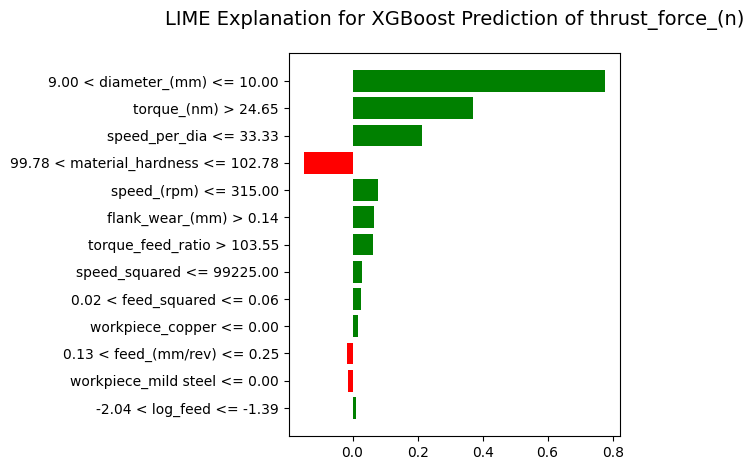


Top contributing features to this prediction:
9.00 < diameter_(mm) <= 10.00  : 0.7763
torque_(nm) > 24.65            : 0.3719
speed_per_dia <= 33.33         : 0.2144
99.78 < material_hardness <= 102.78 : -0.1500
speed_(rpm) <= 315.00          : 0.0794
flank_wear_(mm) > 0.14         : 0.0653
torque_feed_ratio > 103.55     : 0.0636
speed_squared <= 99225.00      : 0.0278
0.02 < feed_squared <= 0.06    : 0.0273
workpiece_copper <= 0.00       : 0.0167
0.13 < feed_(mm/rev) <= 0.25   : -0.0156
workpiece_mild steel <= 0.00   : -0.0140
-2.04 < log_feed <= -1.39      : 0.0092


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load XGBoost model and test data from thrustforce results
xgb_model_thrust = results['XGBoost']['model']
X_test = results['XGBoost']['X_test']
feature_names = X_test.columns.tolist()

# Step 2: Choose test instance to explain
idx = 15  # 🔁 change to any index you want
instance = X_test.iloc[idx].values.reshape(1, -1)

# Step 3: Define predict function with inverse log transform
def predict_fn_thrust(X):
    log_preds = xgb_model_thrust.predict(X)
    return np.expm1(log_preds).reshape(-1, 1)

# Step 4: Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=feature_names,
    mode='regression'
)

# Step 5: Generate LIME explanation
exp = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=predict_fn_thrust,
    num_features=len(feature_names)
)

# Step 6: Plot explanation
fig = exp.as_pyplot_figure()
fig.patch.set_facecolor('white')
plt.title(f"LIME Explanation for XGBoost Prediction of thrust_force_(n)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Step 7: Print feature contributions
print("\nTop contributing features to this prediction:")
for feature, weight in exp.as_list():
    print(f"{feature:30} : {weight:.4f}")

# Optional: Show interactive output in notebook
exp.show_in_notebook()


## Explanations for 5 worst predictions for Thrustforce :


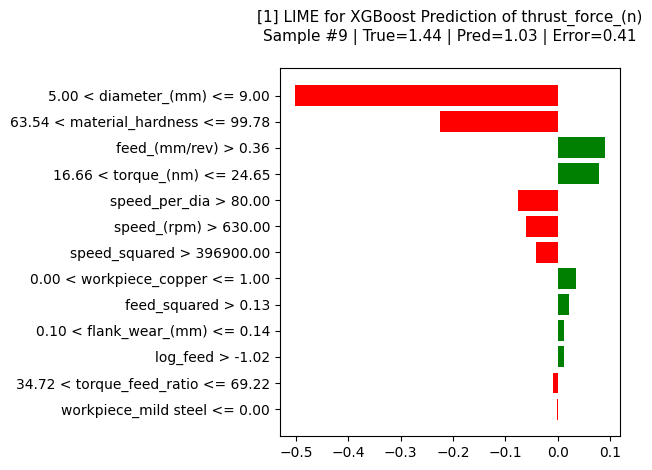


[Sample #9] True: 1.44, Pred: 1.03, Error: 0.41
5.00 < diameter_(mm) <= 9.00        : -0.5009
63.54 < material_hardness <= 99.78  : -0.2246
feed_(mm/rev) > 0.36                : 0.0891
16.66 < torque_(nm) <= 24.65        : 0.0793
speed_per_dia > 80.00               : -0.0759
speed_(rpm) > 630.00                : -0.0599
speed_squared > 396900.00           : -0.0410
0.00 < workpiece_copper <= 1.00     : 0.0339
feed_squared > 0.13                 : 0.0219
0.10 < flank_wear_(mm) <= 0.14      : 0.0116
log_feed > -1.02                    : 0.0115
34.72 < torque_feed_ratio <= 69.22  : -0.0091
workpiece_mild steel <= 0.00        : -0.0024
----------------------------------------------------------------------


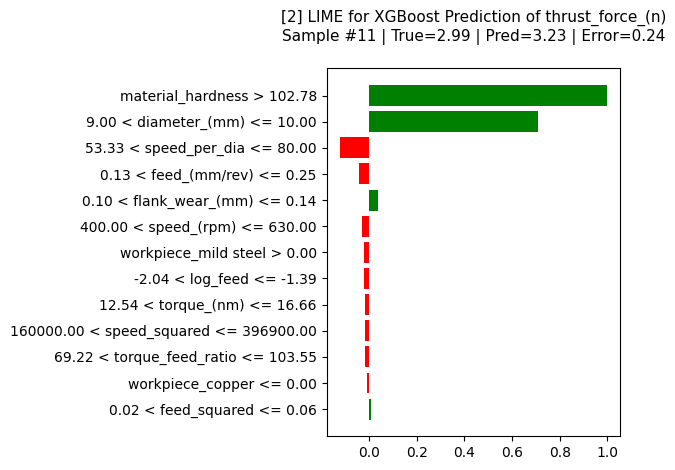


[Sample #11] True: 2.99, Pred: 3.23, Error: 0.24
material_hardness > 102.78          : 0.9974
9.00 < diameter_(mm) <= 10.00       : 0.7093
53.33 < speed_per_dia <= 80.00      : -0.1228
0.13 < feed_(mm/rev) <= 0.25        : -0.0419
0.10 < flank_wear_(mm) <= 0.14      : 0.0374
400.00 < speed_(rpm) <= 630.00      : -0.0304
workpiece_mild steel > 0.00         : -0.0227
-2.04 < log_feed <= -1.39           : -0.0217
12.54 < torque_(nm) <= 16.66        : -0.0195
160000.00 < speed_squared <= 396900.00 : -0.0194
69.22 < torque_feed_ratio <= 103.55 : -0.0172
workpiece_copper <= 0.00            : -0.0077
0.02 < feed_squared <= 0.06         : 0.0075
----------------------------------------------------------------------


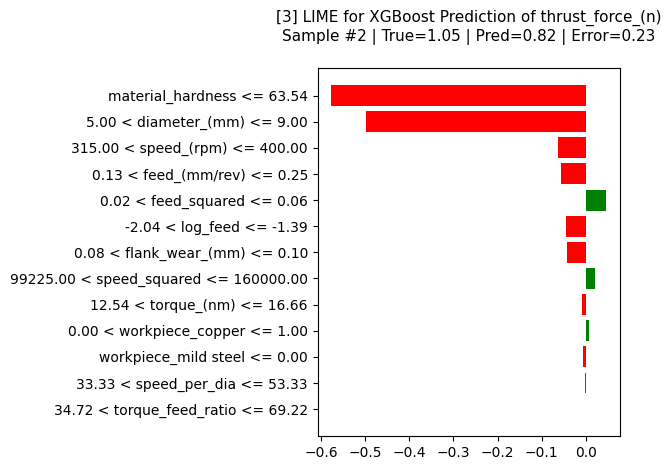


[Sample #2] True: 1.05, Pred: 0.82, Error: 0.23
material_hardness <= 63.54          : -0.5766
5.00 < diameter_(mm) <= 9.00        : -0.4980
315.00 < speed_(rpm) <= 400.00      : -0.0635
0.13 < feed_(mm/rev) <= 0.25        : -0.0551
0.02 < feed_squared <= 0.06         : 0.0466
-2.04 < log_feed <= -1.39           : -0.0458
0.08 < flank_wear_(mm) <= 0.10      : -0.0429
99225.00 < speed_squared <= 160000.00 : 0.0207
12.54 < torque_(nm) <= 16.66        : -0.0079
0.00 < workpiece_copper <= 1.00     : 0.0065
workpiece_mild steel <= 0.00        : -0.0053
33.33 < speed_per_dia <= 53.33      : -0.0011
34.72 < torque_feed_ratio <= 69.22  : -0.0000
----------------------------------------------------------------------


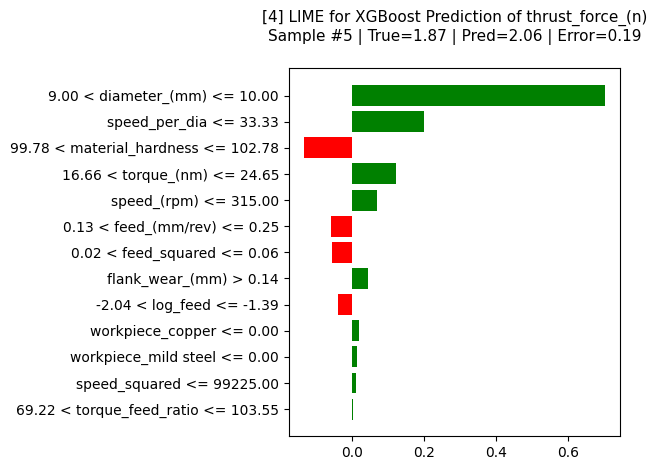


[Sample #5] True: 1.87, Pred: 2.06, Error: 0.19
9.00 < diameter_(mm) <= 10.00       : 0.7033
speed_per_dia <= 33.33              : 0.2010
99.78 < material_hardness <= 102.78 : -0.1333
16.66 < torque_(nm) <= 24.65        : 0.1221
speed_(rpm) <= 315.00               : 0.0695
0.13 < feed_(mm/rev) <= 0.25        : -0.0591
0.02 < feed_squared <= 0.06         : -0.0548
flank_wear_(mm) > 0.14              : 0.0440
-2.04 < log_feed <= -1.39           : -0.0384
workpiece_copper <= 0.00            : 0.0188
workpiece_mild steel <= 0.00        : 0.0148
speed_squared <= 99225.00           : 0.0124
69.22 < torque_feed_ratio <= 103.55 : 0.0043
----------------------------------------------------------------------


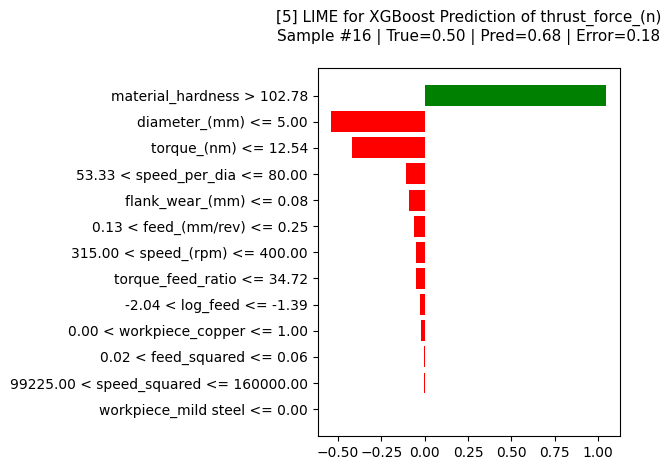


[Sample #16] True: 0.50, Pred: 0.68, Error: 0.18
material_hardness > 102.78          : 1.0470
diameter_(mm) <= 5.00               : -0.5380
torque_(nm) <= 12.54                : -0.4214
53.33 < speed_per_dia <= 80.00      : -0.1085
flank_wear_(mm) <= 0.08             : -0.0880
0.13 < feed_(mm/rev) <= 0.25        : -0.0607
315.00 < speed_(rpm) <= 400.00      : -0.0494
torque_feed_ratio <= 34.72          : -0.0494
-2.04 < log_feed <= -1.39           : -0.0252
0.00 < workpiece_copper <= 1.00     : -0.0236
0.02 < feed_squared <= 0.06         : -0.0059
99225.00 < speed_squared <= 160000.00 : -0.0036
workpiece_mild steel <= 0.00        : -0.0008
----------------------------------------------------------------------


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np

# === Extract model and test data ===
xgb_model = results['XGBoost']['model']
X_test = results['XGBoost']['X_test']
y_test_log = results['XGBoost']['y_test']
y_test_true = np.expm1(y_test_log)
y_pred_true = np.expm1(xgb_model.predict(X_test))

# === Calculate absolute errors ===
errors = np.abs(y_test_true - y_pred_true)

# === Get indices of top N worst errors ===
N = 5
worst_indices = np.argsort(-errors)[:N]

# === Create LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_test.values,
    feature_names=X_test.columns.tolist(),
    mode='regression'
)

# === Loop through top N errors and explain
for rank, idx in enumerate(worst_indices, 1):
    instance = X_test.iloc[idx].values.reshape(1, -1)

    def predict_fn(X):
        return np.expm1(xgb_model.predict(X)).reshape(-1, 1)

    exp = explainer.explain_instance(
        data_row=instance.flatten(),
        predict_fn=predict_fn,
        num_features=len(X_test.columns)
    )

    # Plot LIME explanation
    fig = exp.as_pyplot_figure()
    fig.patch.set_facecolor('white')
    plt.title(f"[{rank}] LIME for XGBoost Prediction of thrust_force_(n)\nSample #{idx} | True={y_test_true.iloc[idx]:.2f} | Pred={y_pred_true[idx]:.2f} | Error={errors.iloc[idx]:.2f}",
              fontsize=11, pad=20)
    plt.tight_layout()
    plt.show()

    # Text summary
    print(f"\n[Sample #{idx}] True: {y_test_true.iloc[idx]:.2f}, Pred: {y_pred_true[idx]:.2f}, Error: {errors.iloc[idx]:.2f}")
    for feature, weight in exp.as_list():
        print(f"{feature:35} : {weight:.4f}")
    print("-" * 70)


# PDP Explanation for XGBoost prediction of thrustforce :

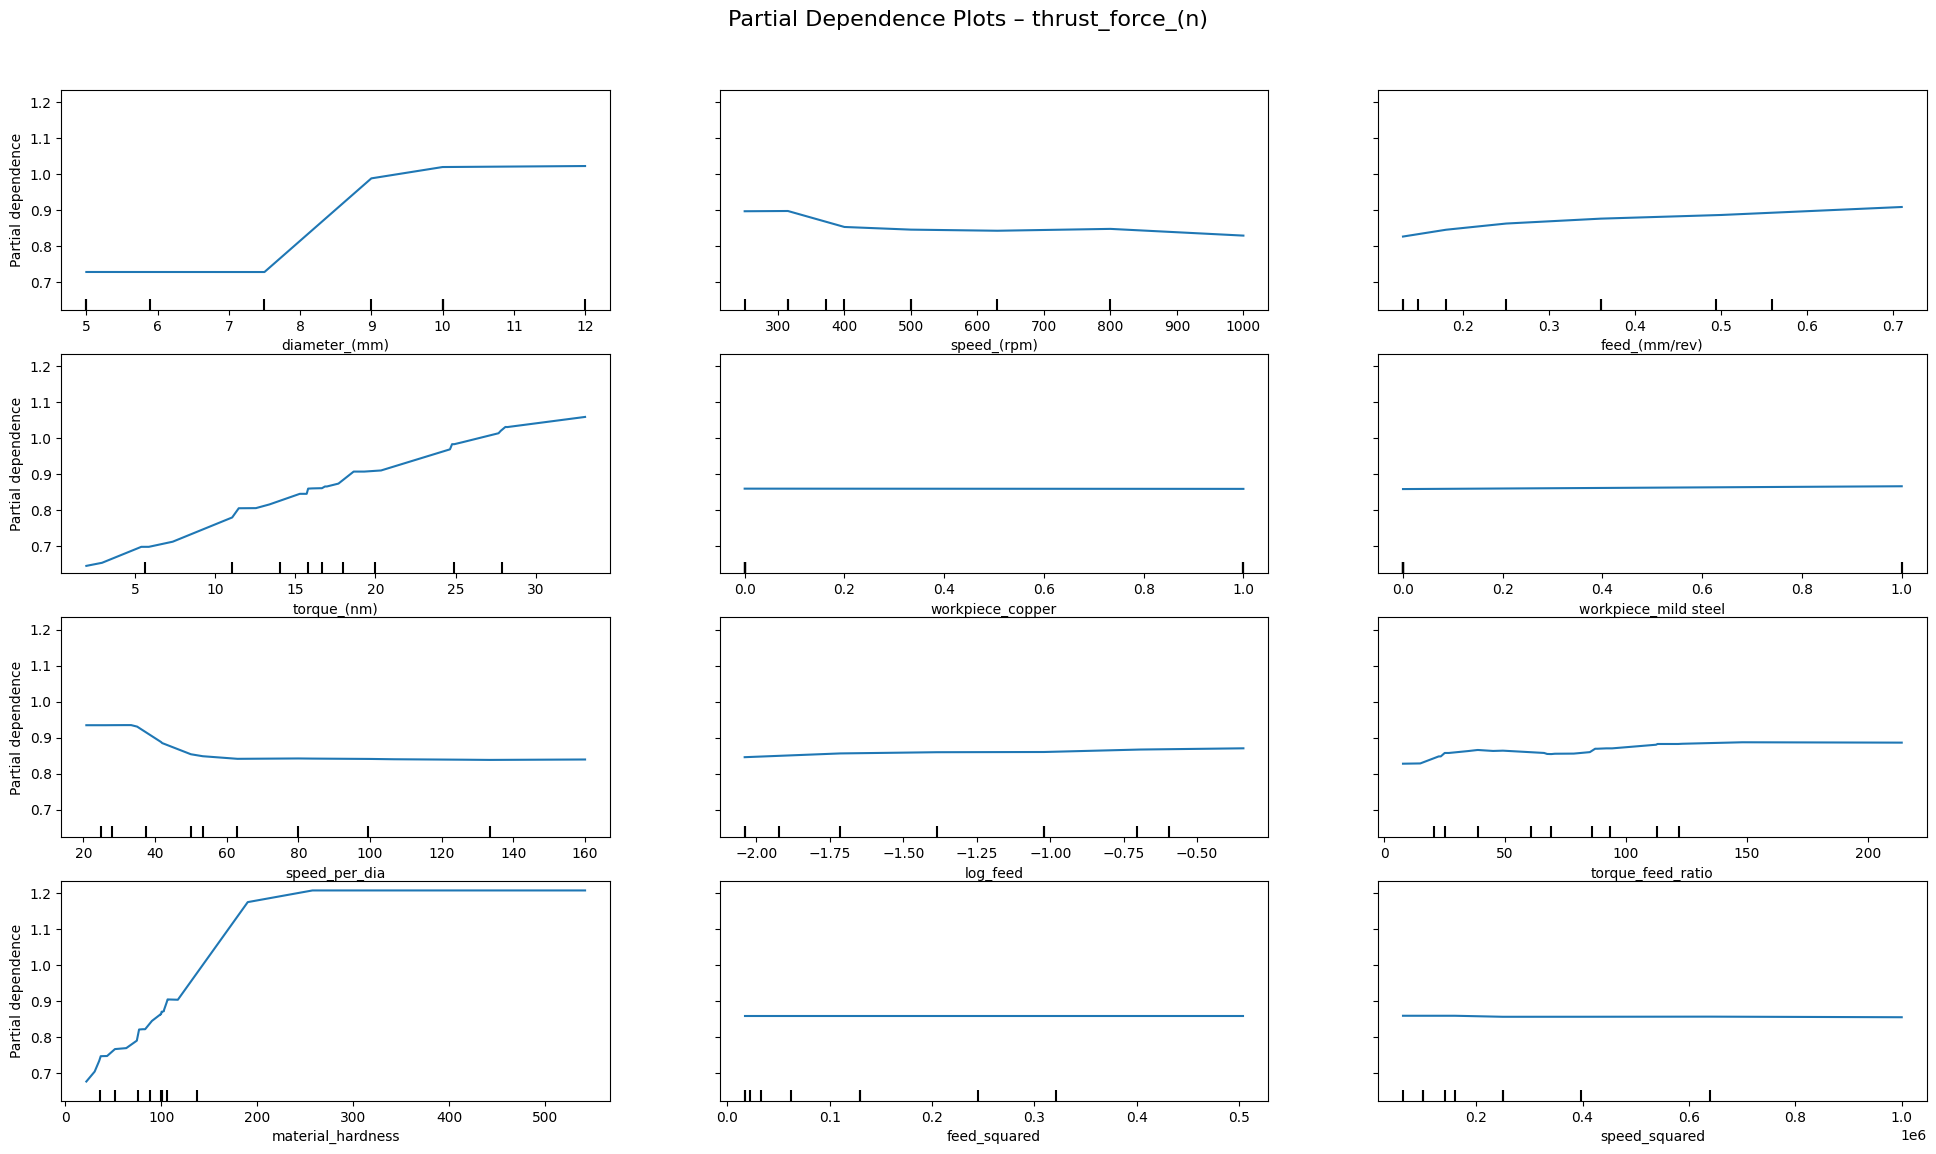

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# XGBoost model and test features
xgb_model = results['XGBoost']['model']
X_test = results['XGBoost']['X_test']

# Choose features to explain
features_to_plot = [
    'diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)', 
    'torque_(nm)', 'workpiece_copper', 'workpiece_mild steel',
    'speed_per_dia', 'log_feed', 'torque_feed_ratio', 
    'material_hardness', 'feed_squared', 'speed_squared']  
fig, ax = plt.subplots(figsize=(20, 12)) 
# Plot PDPs
disp = PartialDependenceDisplay.from_estimator(
    estimator=xgb_model,
    X=X_test,
    features=features_to_plot,
    feature_names=X_test.columns,
    kind='average',              # or 'individual' if you want ICE curves
    grid_resolution=50,
    n_jobs=-1,
    ax=ax
)

plt.suptitle("Partial Dependence Plots – thrust_force_(n)", fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()



_______________________________________________________________________________________________________________________________________________________

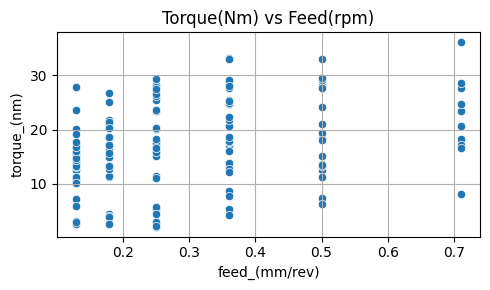

In [ ]:
# ['diameter_(mm)', 'speed_(rpm)', 'feed_(mm/rev)'
# 'thrust_force_(n)', 'flank_wear_(mm)', 'torque_(nm)']
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.scatterplot(data=df_clean, x='feed_(mm/rev)', y='torque_(nm)')
plt.title("Torque(Nm) vs Feed(rpm)")
plt.grid(True)
plt.tight_layout()
plt.show()
